## Imports

In [1]:
import pandas as pd
import sqlite3

In [2]:
connect = sqlite3.connect('../data/checking-logs.sqlite.sqlite')

## analyze only the users and not the admins

In [3]:
request = '''
SELECT uid, timestamp 
FROM checker
WHERE uid LIKE 'user_%'
'''
commits = pd.io.sql.read_sql(request, connect, parse_dates=['timestamp'])
commits

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:35.249331
2,user_4,2020-04-17 05:22:45.549397
3,user_4,2020-04-17 05:34:14.691200
4,user_4,2020-04-17 05:34:24.422370
...,...,...
3202,user_1,2020-05-21 20:19:06.872761
3203,user_1,2020-05-21 20:22:41.785725
3204,user_1,2020-05-21 20:22:41.877806
3205,user_1,2020-05-21 20:37:00.129678


## the fontsize and the figsize are still the same

## night is from 0:00:00 to 03:59:59, morning is from 04:00:00 to 09:59:59, afternoon is from 10:00:00 to 16:59:59, evening is from 17:00:00 to 23:59:59

In [4]:
commits['date'] = commits.timestamp.dt.date
commits['hour'] = commits.timestamp.dt.hour
commits

,uid,timestamp,date,hour
0,user_4,2020-04-17 05:19:02.744528,2020-04-17,5
1,user_4,2020-04-17 05:22:35.249331,2020-04-17,5
2,user_4,2020-04-17 05:22:45.549397,2020-04-17,5
3,user_4,2020-04-17 05:34:14.691200,2020-04-17,5
4,user_4,2020-04-17 05:34:24.422370,2020-04-17,5
...,...,...,...,...
3202,user_1,2020-05-21 20:19:06.872761,2020-05-21,20
3203,user_1,2020-05-21 20:22:41.785725,2020-05-21,20
3204,user_1,2020-05-21 20:22:41.877806,2020-05-21,20
3205,user_1,2020-05-21 20:37:00.129678,2020-05-21,20


In [5]:
commits['daytime'] = pd.cut(commits.hour,
                            bins=[0, 4, 10, 17, 24],
                            labels=['nigth', 'morning',
                                    'afternoon', 'evening'],
                            right=False,
                            include_lowest=True)
commits

,uid,timestamp,date,hour,daytime
0,user_4,2020-04-17 05:19:02.744528,2020-04-17,5,morning
1,user_4,2020-04-17 05:22:35.249331,2020-04-17,5,morning
2,user_4,2020-04-17 05:22:45.549397,2020-04-17,5,morning
3,user_4,2020-04-17 05:34:14.691200,2020-04-17,5,morning
4,user_4,2020-04-17 05:34:24.422370,2020-04-17,5,morning
...,...,...,...,...,...
3202,user_1,2020-05-21 20:19:06.872761,2020-05-21,20,evening
3203,user_1,2020-05-21 20:22:41.785725,2020-05-21,20,evening
3204,user_1,2020-05-21 20:22:41.877806,2020-05-21,20,evening
3205,user_1,2020-05-21 20:37:00.129678,2020-05-21,20,evening


In [6]:
commits_groupped = commits.groupby(by=['date', 'daytime']).count()[
    'hour'].reset_index()
commits_groupped

,date,daytime,hour
0,2020-04-17,nigth,0
1,2020-04-17,morning,13
2,2020-04-17,afternoon,10
3,2020-04-17,evening,0
4,2020-04-18,nigth,0
...,...,...,...
135,2020-05-20,evening,10
136,2020-05-21,nigth,0
137,2020-05-21,morning,1
138,2020-05-21,afternoon,27


In [7]:
df_pivot = pd.pivot(commits_groupped, values='hour',
                    index='date', columns='daytime')
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 2020-04-17 to 2020-05-21
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   nigth      35 non-null     int64
 1   morning    35 non-null     int64
 2   afternoon  35 non-null     int64
 3   evening    35 non-null     int64
dtypes: int64(4)
memory usage: 1.4+ KB


## choose a palette that you really enjoy, you do not have to replicate it from the graph above

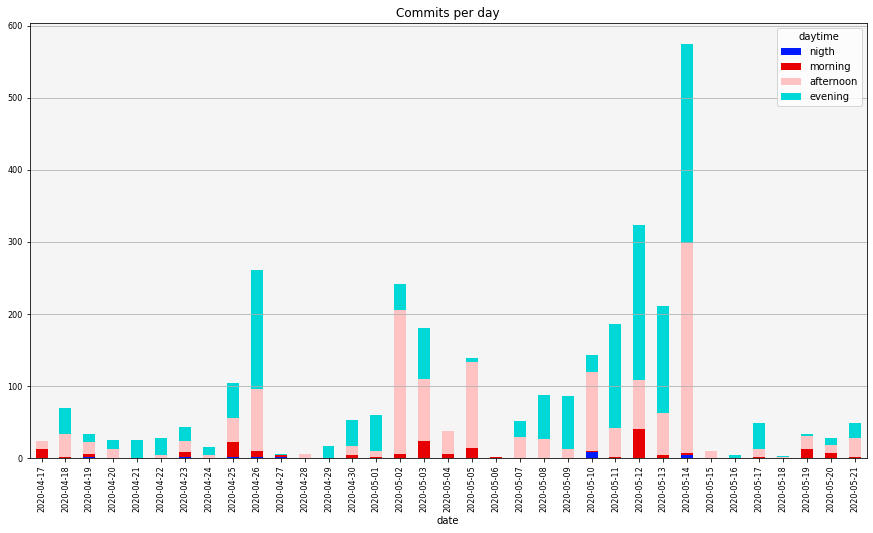

In [8]:
ax = df_pivot.plot(kind='bar',
                   stacked=True,
                   figsize=(15, 8),
                   title='Commits per day',
                   fontsize=8,
                   rot=90,
                   color=['#001AFF', '#E60000', '#FFC3C3', '#00D7D7'])
ax.set_facecolor('#F5F5F5')
ax.grid('on', which='major', axis='y')

## at the end of your Jupyter Notebook, create a markdown cell and insert the questions:

In [9]:
df_pivot.sum().sort_values(ascending=False)

daytime
evening      1611
afternoon    1391
morning       184
nigth          21
dtype: int64

#### "evening and afternoon" - when our users usually commit the labs

In [10]:
df_pivot[df_pivot['evening'] > df_pivot['afternoon']].sum(
    axis=1).sort_values(ascending=False)

date
2020-05-12    323
2020-04-26    261
2020-05-13    211
2020-05-11    186
2020-04-25    104
2020-05-08     87
2020-05-09     86
2020-04-18     69
2020-05-01     60
2020-04-30     53
2020-05-17     48
2020-04-23     43
2020-04-22     28
2020-04-20     25
2020-04-21     25
2020-04-29     17
2020-04-24     16
2020-04-27      6
2020-05-16      4
2020-05-18      3
dtype: int64

#### 2020-05-12 - the day when the number of commits in the evening is higher than in the afternoon

In [11]:
connect.close()